In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
smallData = False
# smallData = True
my_chunk_size = 250000

In [59]:
if smallData:
    train_chunks = pd.read_csv('data/train.csv',  chunksize = my_chunk_size) 
    train = train_chunks.get_chunk(my_chunk_size)
    
    test_chunks = pd.read_csv('data/test.csv',  chunksize = my_chunk_size)     
    test = test_chunks.get_chunk(my_chunk_size)
    
else: # Process all the data
    train = pd.read_csv('data/train.csv') 
    test = pd.read_csv('data/test.csv')  

In [123]:
print(train.shape)
train.head()

(1804874, 45)


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [124]:
print(test.shape)
test.head()

(97320, 2)


,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


In [125]:
def get_word_count(sentence):
    return len(sentence.split())

In [126]:
lengths = train['comment_text'].apply(get_word_count)
max_words_in_comment = lengths.max()
print("largest number of words in a comment is",max_words_in_comment)
max_words = max_words_in_comment*2#this is the size of the neural network input


largest number of words in a comment is 317


In [127]:
test_narrowed = train[['id','target', 'comment_text']]
test_narrowed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 3 columns):
id              int64
target          float64
comment_text    object
dtypes: float64(1), int64(1), object(1)
memory usage: 41.3+ MB


In [128]:
def target(value):
    if value>=0.5:
        return 1
    else:
        return 0


In [129]:
   
# This runs much faster than the lamda
test_narrowed['truth'] = test_narrowed['target'].apply(target).astype('float32') 

Text(0.5, 1.0, 'Targets')

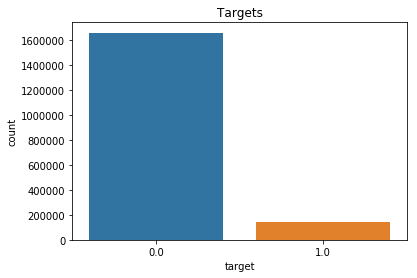

In [130]:
sns.countplot(test_narrowed.truth)
plt.xlabel('target')
plt.title('Targets')

In [131]:
# distribution of length of comments

x = pd.Series(lengths).sort_values().astype('float32') 
y = len(lengths)


print ("number of records", y)



number of records 1804874


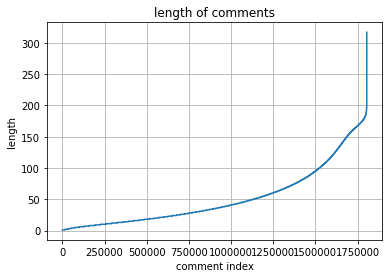

In [148]:
plot(range(len(lengths)),x)
xlabel('comment index')
ylabel('length')
title('length of comments')
grid(True)
show()

99.3% of the data is not outliers


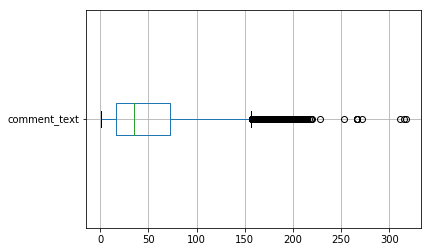

In [133]:
# pd.DataFrame(x).boxplot()
x.plot.box(grid=True,vert=False)
print("99.3% of the data is not outliers")


In [134]:
x.describe()

count    1.804874e+06
mean     5.127689e+01
std      4.617812e+01
min      1.000000e+00
25%      1.600000e+01
50%      3.500000e+01
75%      7.200000e+01
max      3.170000e+02
Name: comment_text, dtype: float64

In [135]:
hist_sections = np.arange(start=0, stop=330, step=10)
hist_sections

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320])

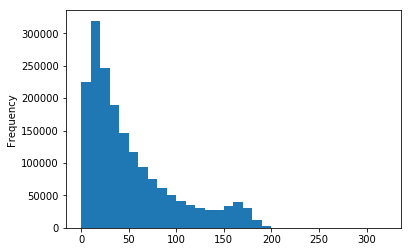

In [136]:
# wn_carrier = data[x == 'WN']
# wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

x.plot(kind='hist', bins=hist_sections) # `bins` defines the start and end points of bins


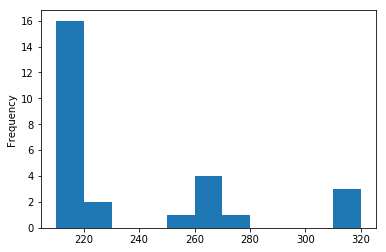

In [137]:
hist_sections = np.arange(start=210, stop=330, step=10)
x.plot(kind='hist', bins=hist_sections) # `bins` defines the start and end points of bins

### Let's look at only toxic comments

In [210]:
# print(test_narrowed.head(1000))
toxic_only = test_narrowed[ test_narrowed["truth"]==1.0]
# print(toxic_only)

In [235]:
toxic_only["word_count"] = toxic_only.comment_text.apply(get_word_count)
toxic_only.sort_values(by=["word_count","comment_text"],inplace=True)
print("Already we can see that toxic comments can still be long: ")
toxic_only.tail(10)

Already we can see that toxic comments can still be long: 


,id,target,comment_text,truth,word_count
642879,1029117,0.500000,"I want a job at Costco, but won't fill out an ...",1.0,201
1622665,6109440,0.500000,These players are a joke . The very fact they ...,1.0,201
1510746,5969862,0.600000,With a completion date of 2030 & a prictag of ...,1.0,201
304549,614885,0.600000,Worked so hard for the physical and mental dam...,1.0,201
305603,616113,0.700000,Yes and people would have shot and killed any ...,1.0,202
1532084,5996816,0.666667,Just what is so good about Walker?? Did you fo...,1.0,203
195082,480072,0.500000,"People, easy now. . . take a deep breath. Let ...",1.0,203
1359951,5778243,0.764706,"When I was 12, my goal for the whole year was ...",1.0,204
1747304,6264024,0.500000,I have had an interesting life with raising my...,1.0,207
919326,5244486,0.842857,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,1.0,311


In [236]:
toxic_only

,id,target,comment_text,truth,word_count
201563,488119,0.600000,"""Thug""?",1.0,1
985179,5323020,0.500000,#FakePresident,1.0,1
1399082,5828389,0.500000,#FakeTrump,1.0,1
132990,404630,0.800000,#TRAITORtRUMP,1.0,1
1122047,5487011,0.500000,#fakepresident,1.0,1
1652036,6146962,0.614286,#pathetic,1.0,1
1600100,6079760,0.666667,*arse,1.0,1
620731,1002068,0.833333,..troll..,1.0,1
93913,357347,1.000000,Andree...baloney.,1.0,1
940229,5268990,0.921875,Ass.,1.0,1


Toxic rating 0.8428571428571427
Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha (choke, gasp) ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha haha ha ha ha ha ha ha ha ha ha ha ha ha (choke, gasp) ha ha ha ha ha ha ha ha ha ha ha ha ha (choke, gasp) ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha haha ha ha ha ha ha ha ha ha ha ha ha ha (choke, gasp) ha ha ha ha.......

Ontarians can't be TH

(144334, 5)


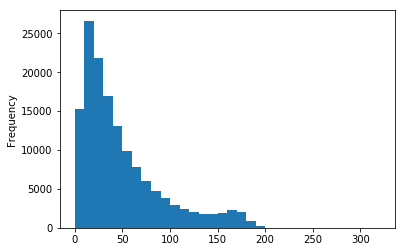

In [230]:
hist_sections = np.arange(start=0, stop=330, step=10)
toxic_only.word_count.plot(kind='hist', bins=hist_sections) # `bins` defines the start and end points of bins
print(toxic_only.shape)

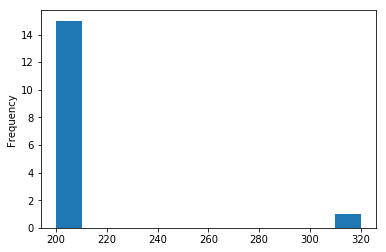

In [231]:
hist_sections = np.arange(start=200, stop=330, step=10)
toxic_lengths.plot(kind='hist', bins=hist_sections)

There are plenty of short comments


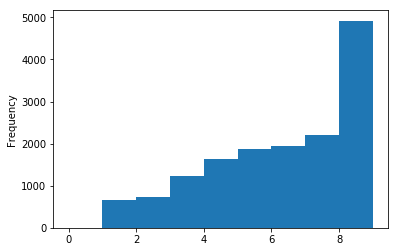

In [232]:
hist_sections = np.arange(start=0, stop=10, step=1)
toxic_only.word_count.plot(kind='hist', bins=hist_sections)
print("There are plenty of short comments")

The variance is smaller for toxic comments, but not drastically smaller.


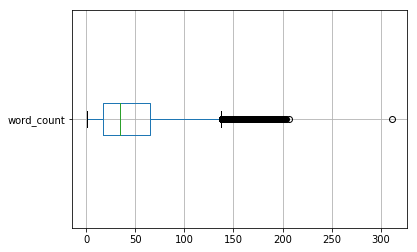

In [233]:
toxic_only.word_count.plot.box(grid=True,vert=False)
print("The variance is smaller for toxic comments, but not drastically smaller.")

In [ ]:
comments_to_print=[5244486,6264024,357347,280369]
for i in comments_to_print:
    print("Toxic rating",toxic_only.loc[toxic_only["id"] == i].target.item())
    print(toxic_only.loc[toxic_only["id"] == i].comment_text.item())
    print("----------------------------------\n")